In [2]:
import pandas as pd
df=pd.read_csv("synthetic_fraud_dataset.csv")

In [3]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

array([[<Axes: title={'center': 'Transaction_Amount'}>,
        <Axes: title={'center': 'Account_Balance'}>,
        <Axes: title={'center': 'IP_Address_Flag'}>],
       [<Axes: title={'center': 'Previous_Fraudulent_Activity'}>,
        <Axes: title={'center': 'Daily_Transaction_Count'}>,
        <Axes: title={'center': 'Avg_Transaction_Amount_7d'}>],
       [<Axes: title={'center': 'Failed_Transaction_Count_7d'}>,
        <Axes: title={'center': 'Card_Age'}>,
        <Axes: title={'center': 'Transaction_Distance'}>],
       [<Axes: title={'center': 'Risk_Score'}>,
        <Axes: title={'center': 'Is_Weekend'}>,
        <Axes: title={'center': 'Fraud_Label'}>]], dtype=object)

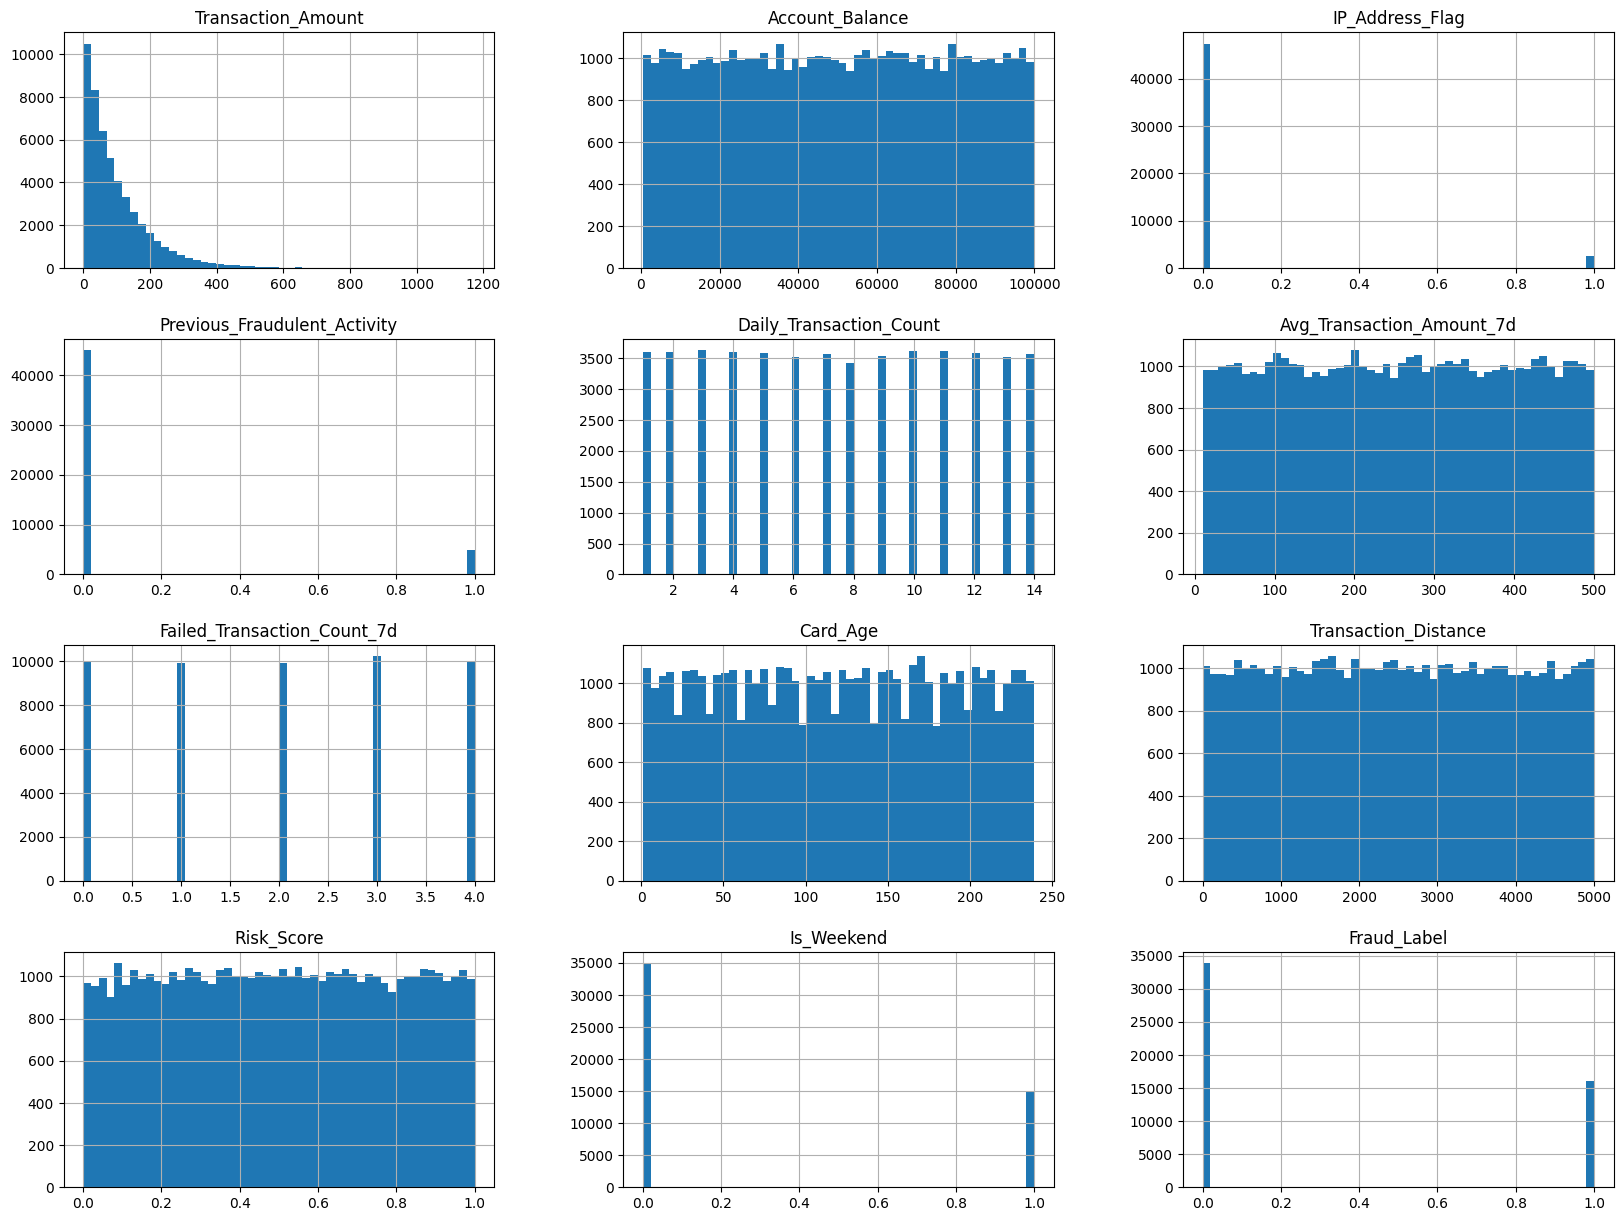

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
df.show()

In [7]:
#correlation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix=numeric_df.corr()
corr_matrix["Fraud_Label"]

,Fraud_Label
Transaction_Amount,0.001901
Account_Balance,-0.003153
IP_Address_Flag,0.003028
Previous_Fraudulent_Activity,-0.000718
Daily_Transaction_Count,-0.007065
Avg_Transaction_Amount_7d,0.000703
Failed_Transaction_Count_7d,0.509871
Card_Age,-0.003120
Transaction_Distance,-0.000116
Risk_Score,0.385810


In [8]:
#create train and test set
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2, random_state=42)

In [9]:
#Assign Variables
x1=train["Failed_Transaction_Count_7d"]
x2=train["Risk_Score"]
y=train["Fraud_Label"]
m=len(y)

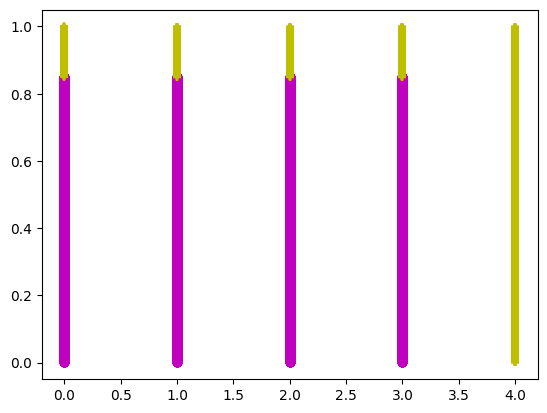

In [11]:
plt.scatter(x1.loc[y==0],x2.loc[y==0],c="m",marker="o",label="0")
plt.scatter(x1.loc[y==1],x2.loc[y==1],c="y",marker="+",label="1")

In [19]:
#Feature preparation
x = pd.concat([x1,x2],axis=1)
x

,Failed_Transaction_Count_7d,Risk_Score
39087,4,0.3668
30893,1,0.4866
45278,2,0.2961
16398,2,0.3362
13653,1,0.0804
...,...,...
11284,1,0.0872
44732,4,0.5109
38158,0,0.7671
860,1,0.9580


In [20]:
# Define Classifiers
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

from sklearn.svm import SVC
svm_clf = SVC()


from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(x, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [21]:
# Accuracy Score for test
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
 clf.fit(x, y)
 y_pred = clf.predict(x)
 print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.8095
RandomForestClassifier 1.0
SVC 0.998425
VotingClassifier 0.998775


In [22]:
# Accuracy Score for test
x1t=test["Failed_Transaction_Count_7d"]
x2t=test["Risk_Score"]
yt=test["Fraud_Label"]
xt = pd.concat([x1t,x2t],axis=1)
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
 ypt = clf.predict(xt)
 print(clf.__class__.__name__, accuracy_score(yt, ypt))

LogisticRegression 0.7987
RandomForestClassifier 1.0
SVC 0.9986
VotingClassifier 0.9993


In [27]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x, y)
y_p = xgb_reg.predict(x)
y_p = [round(value) for value in y_p]
accuracy_score(y, y_p)

0.99935

In [25]:
y

,Fraud_Label
39087,1
30893,0
45278,0
16398,0
13653,0
...,...
11284,0
44732,1
38158,0
860,1
